## Downloads / Imports / Useful functions / Third party connections 
---

Downloads

In [1]:
!pip install basemap

Imports

In [ ]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from matplotlib import dates
import sklearn
from sklearn import cluster
import pandas as pd
import os
from copy import deepcopy
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Useful functions

In [137]:
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',vmin=20,vmax=32,lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)

# function to plot time series
def plot_ts(time,ts,line_type,var_name,var_name_2):

    # plot
    plot_date(time,ts,line_type)
    xlabel(var_name,fontsize=15)
    ylabel(var_name_2,fontsize=15)

def save_output(output,filename,path='/content/drive/MyDrive/project bigdata'):
  """
  Save a pandas DataFrame in a csv file
 
        :param output: dataframe of date
        :type output: pandas.core.frame.DataFrame
        :param filename: name of file
        :type filename: str
        :param path : where to save the file
        :type path : str
  """
  os.chdir(path)
  output.to_csv(filename)

def get_frames(datetime_begin,datetime_end,data):
  """
  Return frames for the video.
 
        Given a start and end date, return all the frames needed to plot a video.
 
        :param datetime_begin: the python datetime to begin with
        :type datetime_begin: datetime.datetime
        :param datetime_end: the python datetime to finish
        :type datetime_end: datetime.datetime
        :param data : dataframe with lat,lon,time and the field (sst or diff_sst) to plot
        :type data : pandas.core.frame.DataFrame
        :return: list of frames
        :rtype: list
  """
  # Plot the edges in order to have the same map in each frame
  extra_lon = [120,145,120,145]
  extra_lat = [20,40,40,20]
  extra_diff_sst = [0,0,0,0]

  typhoon = data[data.time >= date2num(datetime_begin)][data.time <= date2num(datetime_end)]

  frames = []
  for time_value in typhoon.time.unique():
    filter = typhoon["time"]==time_value
    to_add = pd.DataFrame({"lat":extra_lat,"lon":extra_lon,"diff_sst":extra_diff_sst})
    frames.append(typhoon[filter].append(to_add).fillna(method="ffill"))
  return frames


def get_video(frames,field="sst",title=None,save=False,name=None):
  """
  Display a video.
 
        Given frames, display the relative video.
 
        :param frames: list of frames
        :type frames: list
        :param field: field to plot
        :type field: str
        :param title : title of the video
        :type title : str
        :param save : save or not the video
        :type save : boolean
        :param name : name of file
        :type name : str
        :return: a video
        :rtype: IPython.core.display.HTML
  """
  fig,ax = subplots(figsize=(20,10))
  def update(frame):
    clf()
    suptitle(title)
    plt.title(f'le {dates.num2date(frame.time.unique()[0]).strftime("%d/%m/%Y")}')
    plot_im(frame.lon,frame.lat,frame[field],15,field)
  anim = animation.FuncAnimation(fig,update,frames=frames,interval=300)
  if save :
    anim.save(f"/content/drive/MyDrive/project bigdata{name}.mp4")
  return HTML(anim.to_html5_video())

def plot_im_traj(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)

Third party connections



In [4]:
from google.colab import auth
auth.authenticate_user()

## Trajectory of known Typhoons : PHANFONE & FENGSHEN

---

In this part, we will watch typhoons trajectories (PHANFONE and FENGSHEN) thanks to a short video. We have done research to know when typhoons appeared. Then, we used big queries in order to recover interesting data. We will also show how the average sst over an area behaves over time.

###PHANFONE


In [102]:
%%bigquery --project alert-ground-261008 PHANFONE_2014
SELECT sst, lon, lat, time
FROM bdo2020.bdo2020.1998_2015
WHERE lat>15 and lat<40 and lon>120 and lon<145 and DATE_ADD(DATE(1,1,1), INTERVAL CAST(time as INT64) DAY) >= DATE(2014,9,27) and DATE_ADD(DATE(1,1,1), INTERVAL CAST(time as INT64) DAY) <= DATE(2014,10,10)
ORDER BY time

In [ ]:
save_output(PHANFONE_2014,'PHANFONE_2014.cvs')

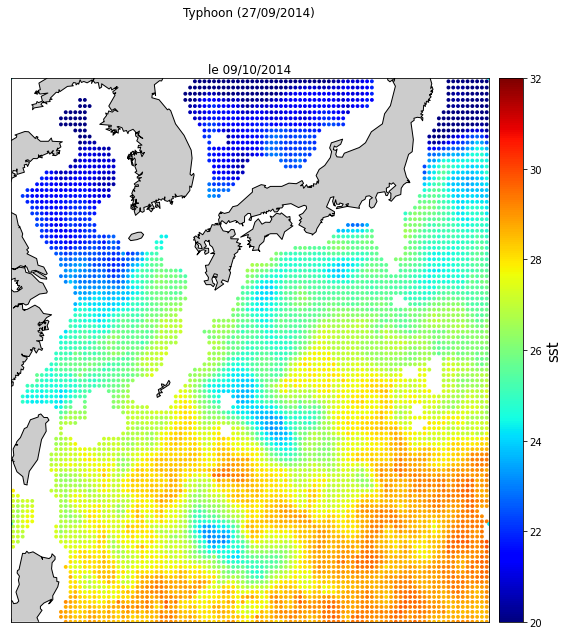

In [138]:
frames = get_frames(datetime.datetime(2014,9,27),datetime.datetime(2014,10,10),PHANFONE_2014)
get_video(frames,title="Typhoon (27/09/2014)",save=True,name="PHANFONE_2014")

Here we are gonne to plot the average sst over time

In [130]:
%%bigquery --project alert-ground-261008 PHANFONE_mean

SELECT AVG(sst) as sst_mean, time
FROM bdo2020.bdo2020.1998_2015
WHERE lat>15 and lat<40 and lon>120 and lon<145 and DATE_ADD(DATE(1,1,1), INTERVAL CAST(time as INT64) DAY) >= DATE(2014,9,27) and DATE_ADD(DATE(1,1,1), INTERVAL CAST(time as INT64) DAY) <= DATE(2014,10,10)
GROUP BY time
ORDER BY time

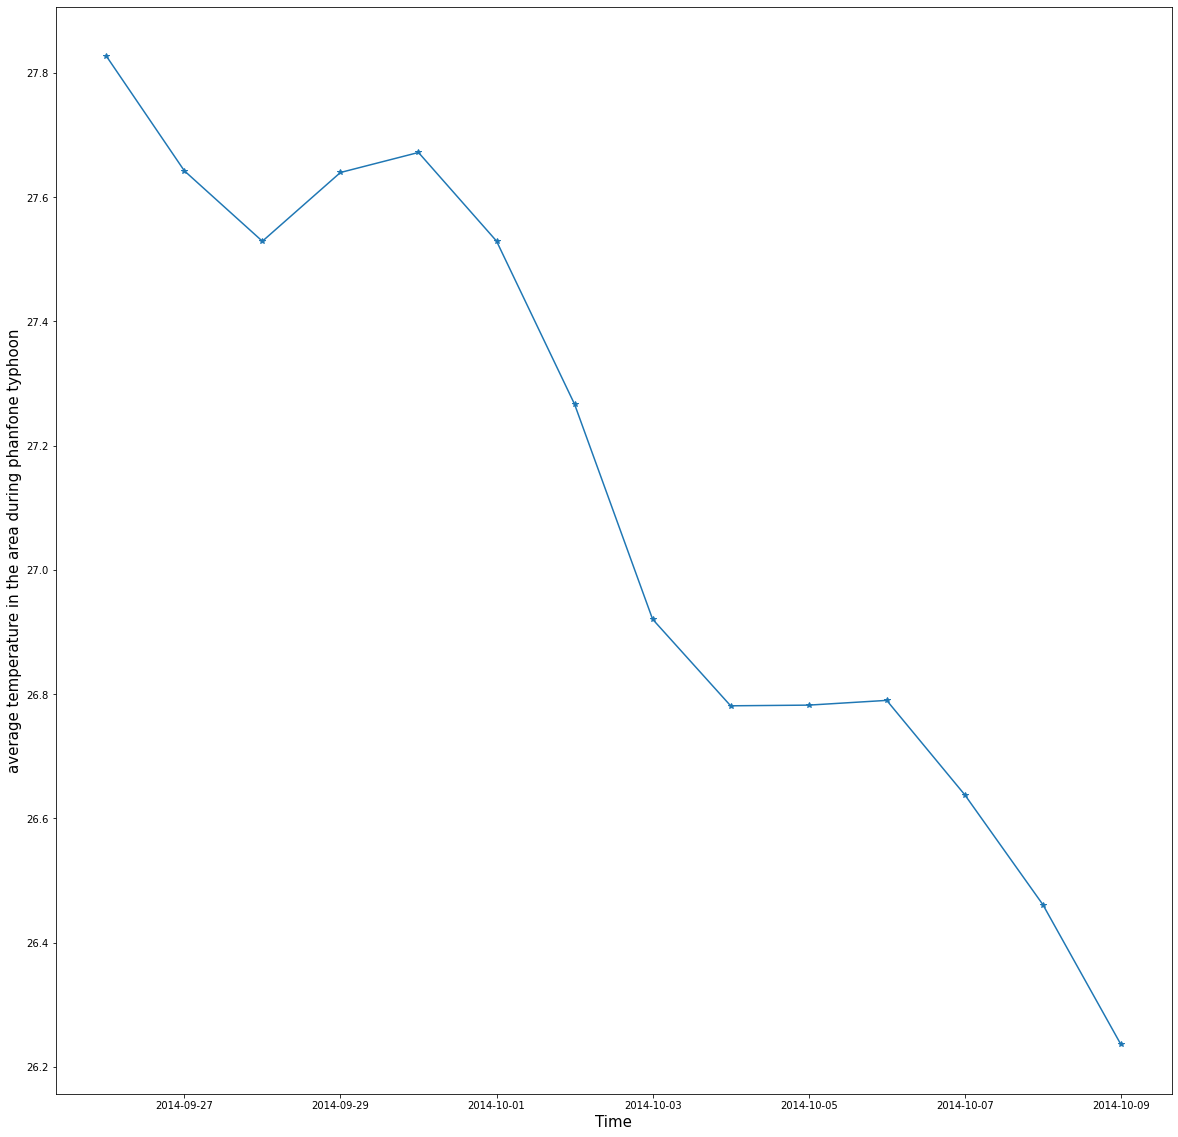

In [131]:
plot_ts(PHANFONE_mean.time,PHANFONE_mean.sst_mean,'-*','Time','average temperature in the area during phanfone typhoon')

We are trying in the cell below to plot the continuous function. We suggest to use a linear tendancy.

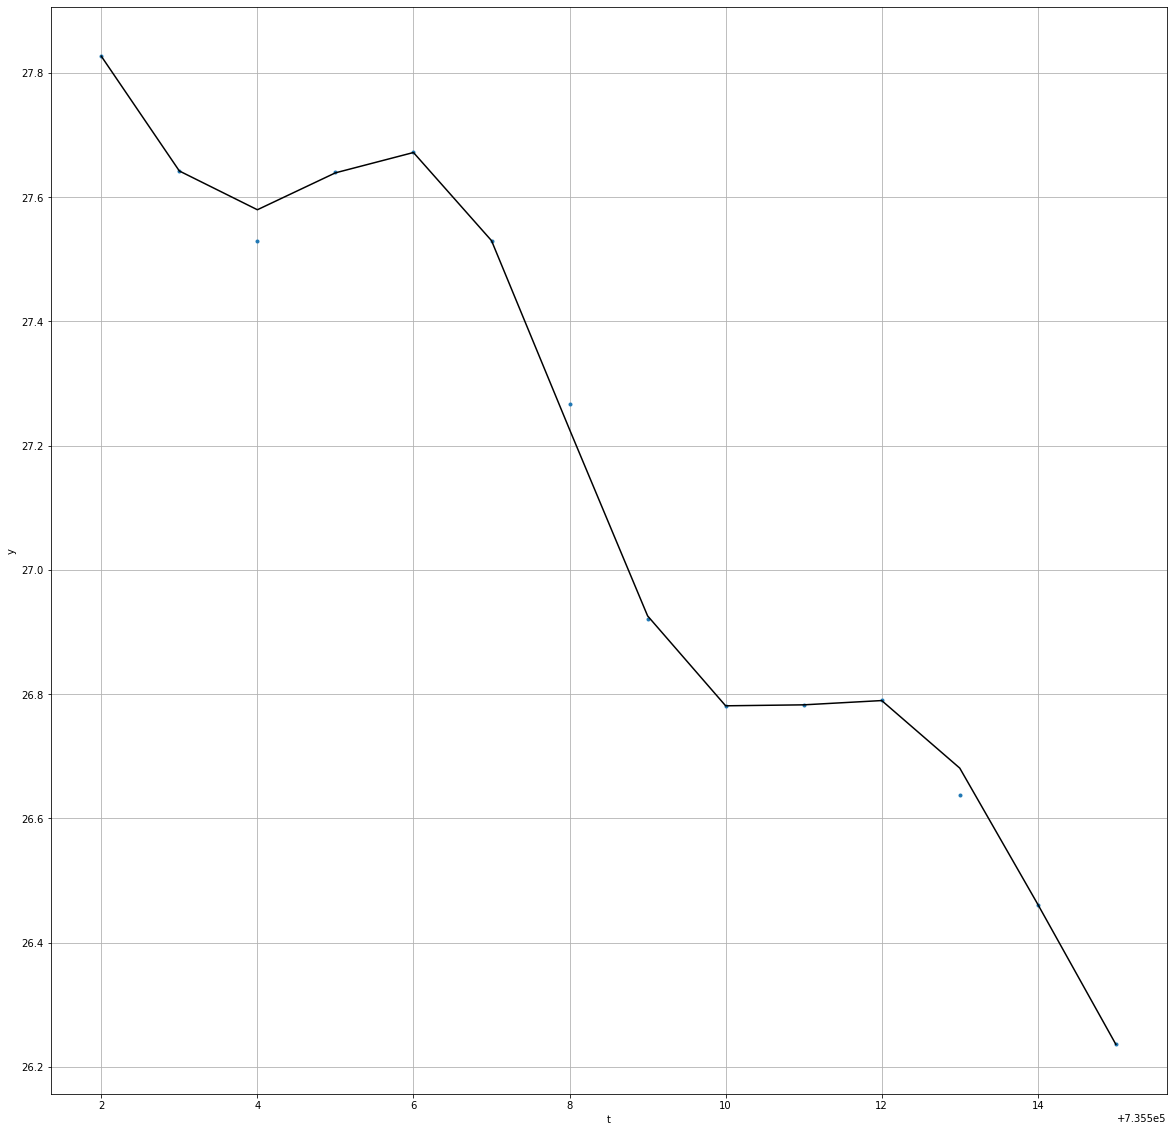

In [132]:
epsilon = 0.0001

# set up a generic instance of the model
model=SVR(C=50, epsilon=epsilon)
# C is the "regularisation" term: this stops
# the model from becoming too complicated (overfitting)
# smaller C gives stronger regularisation (i.e. a simpler model)

# fit the model
model.fit(PHANFONE_mean.time[:,None],PHANFONE_mean.sst_mean)

# and predict values of ŷ
y_hat=model.predict(PHANFONE_mean.time[:,None])

plt.plot(PHANFONE_mean.time,PHANFONE_mean.sst_mean,'.')
plt.plot(PHANFONE_mean.time,y_hat,'k-')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()

We can notice that it decreases some days after the typhoon has passed.

###FENGSHEN


In [110]:
%%bigquery --project alert-ground-261008 FENGSHEN_2014
SELECT sst, lon, lat, time
FROM bdo2020.bdo2020.1998_2015
WHERE lat>15 and lat<40 and lon>120 and lon<145 and DATE_ADD(DATE(1,1,1), INTERVAL CAST(time as INT64) DAY) >= DATE(2014,9,5) and DATE_ADD(DATE(1,1,1), INTERVAL CAST(time as INT64) DAY) <= DATE(2014,9,11)
ORDER BY time

In [111]:
save_output(FENGSHEN_2014,'FENGSHEN_2014.cvs')

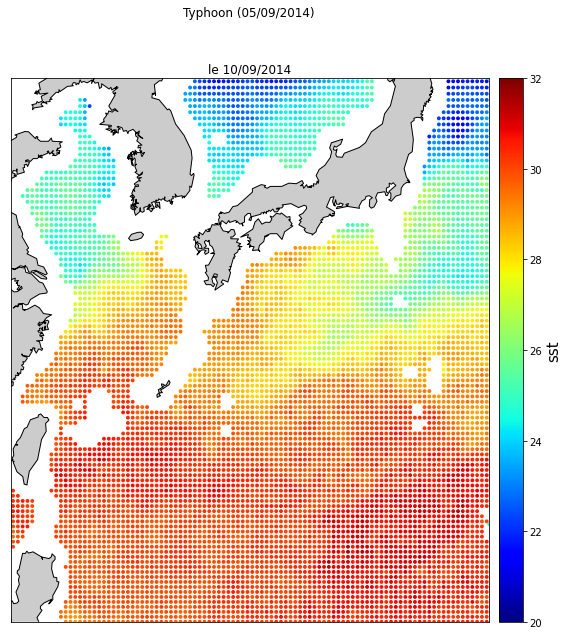

In [113]:
frames = get_frames(datetime.datetime(2014,9,5),datetime.datetime(2014,9,11),FENGSHEN_2014)
get_video(frames,title="Typhoon (05/09/2014)",save=True,name="FENGSHEN_2014")

## Finding the trajectory: Clustering

---

###Our Work

Dimitri and Bérénice tried to catch the minimum sst over the area. It did not work well. Then we came up with another idea. The basic idea is that typhoons will cause a large area of rapid temperature variation. Then, the largest cluster detected in the area corresponds to the typhoon and we just have to take the centre for a good approximation of its passage. We then look at the centroid of the cluster. The algorithm used here is a kmeans on temperature variation with longitude, latitude and sst difference between two consecutive days as input data.

In [ ]:
%%bigquery --project alert-ground-261008 global_diff

WITH diff AS

(
  SELECT lon,lat,LAG(sst,1,0.0) OVER(ORDER BY lon,lat,time) as lag_sst,time
  FROM bdo2020.bdo2020.1998_2015
  WHERE lat>20 and lat<40 and lon>120 and lon<145 
  ORDER BY time
)


SELECT diff_sst,lat,lon,time
FROM (
  FROM bdo2020.bdo2020.1998_2015 as norm
  JOIN diff ON (diff.time = norm.time and diff.lon = norm.lon and diff.lat = norm.lat)
  ORDER BY time
)
WHERE diff_sst<-.4

In [10]:
save_output(global_diff,"global_diff_neg.csv")

In [124]:
def typhoon_center_of_day(df):

  data = df.loc[df.diff_sst<-.8]
  data.drop(columns = ['time'], inplace=True )
  kmeans = cluster.KMeans(n_clusters=2)
  kmeans.fit(data)
  labels = kmeans.labels_
  size_clusters = np.bincount(labels)
  idx_big_cluster = np.argmax(size_clusters)
  typhoon_center = kmeans.cluster_centers_[idx_big_cluster][1:]
  return typhoon_center[1],typhoon_center[0]


def plot_typhoon_traj_kmean(start_date,global_diff,var_name,duration=4):

  int_date = dates.date2num(np.datetime64(start_date))
  Lon,Lat = [],[]
  im = [i for i in range(duration)] + [0]*4
  for i in range(duration):
    df_aux = global_diff.loc[global_diff.time ==  int_date+i]
    lon,lat = typhoon_center_of_day(df_aux)
    
    Lon.append(lon)
    Lat.append(lat)
  #plot(Lon,Lat)
  extra_lon = [120,145,120,145]
  extra_lat = [20,40,40,20]
  Lon +=extra_lon
  Lat +=extra_lat
  plot_im_traj(Lon,Lat,im,size_points=100,var_name=var_name)

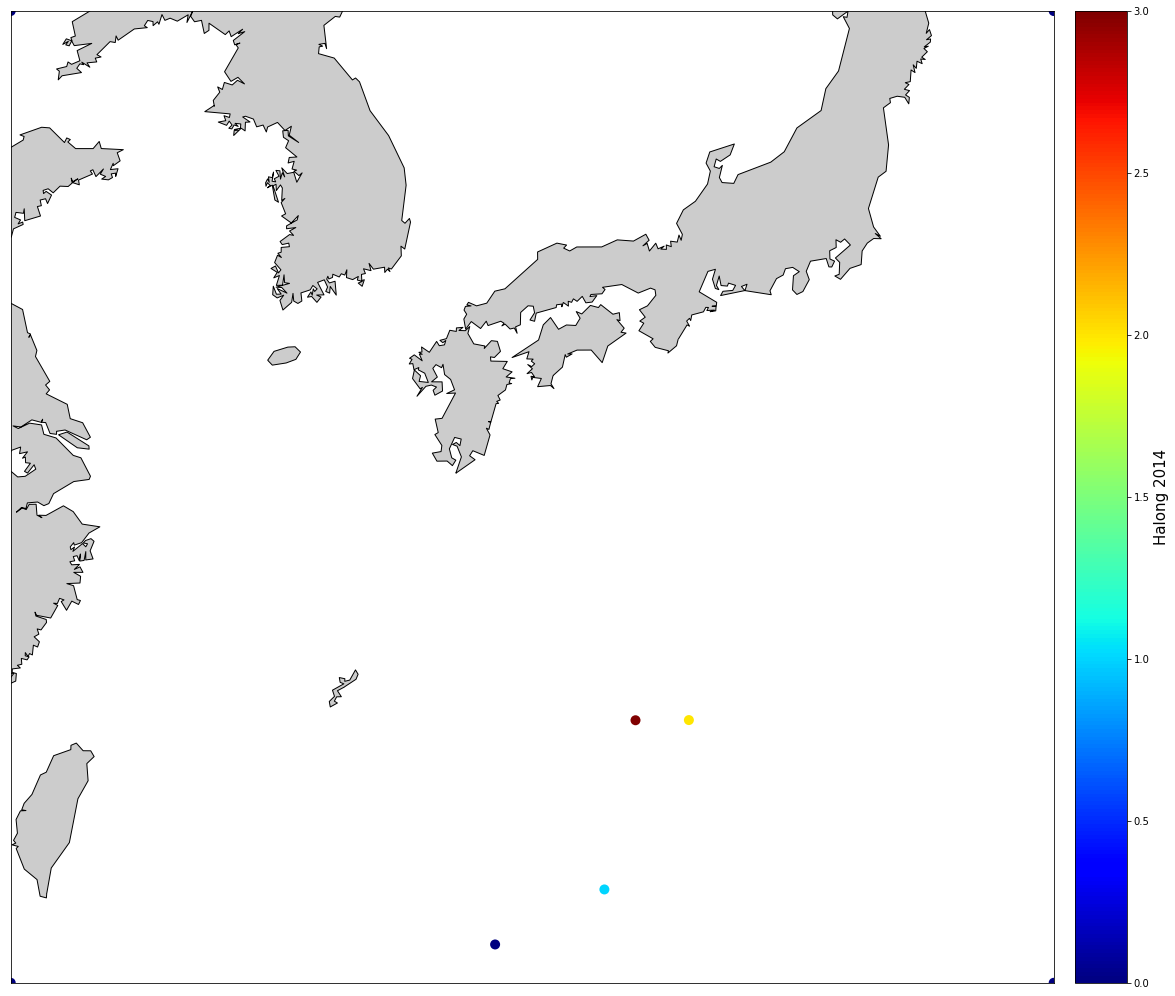

In [139]:
plot_typhoon_traj_kmean('2014-08-07 00:00:00+00:00',global_diff,'Halong 2014',4)

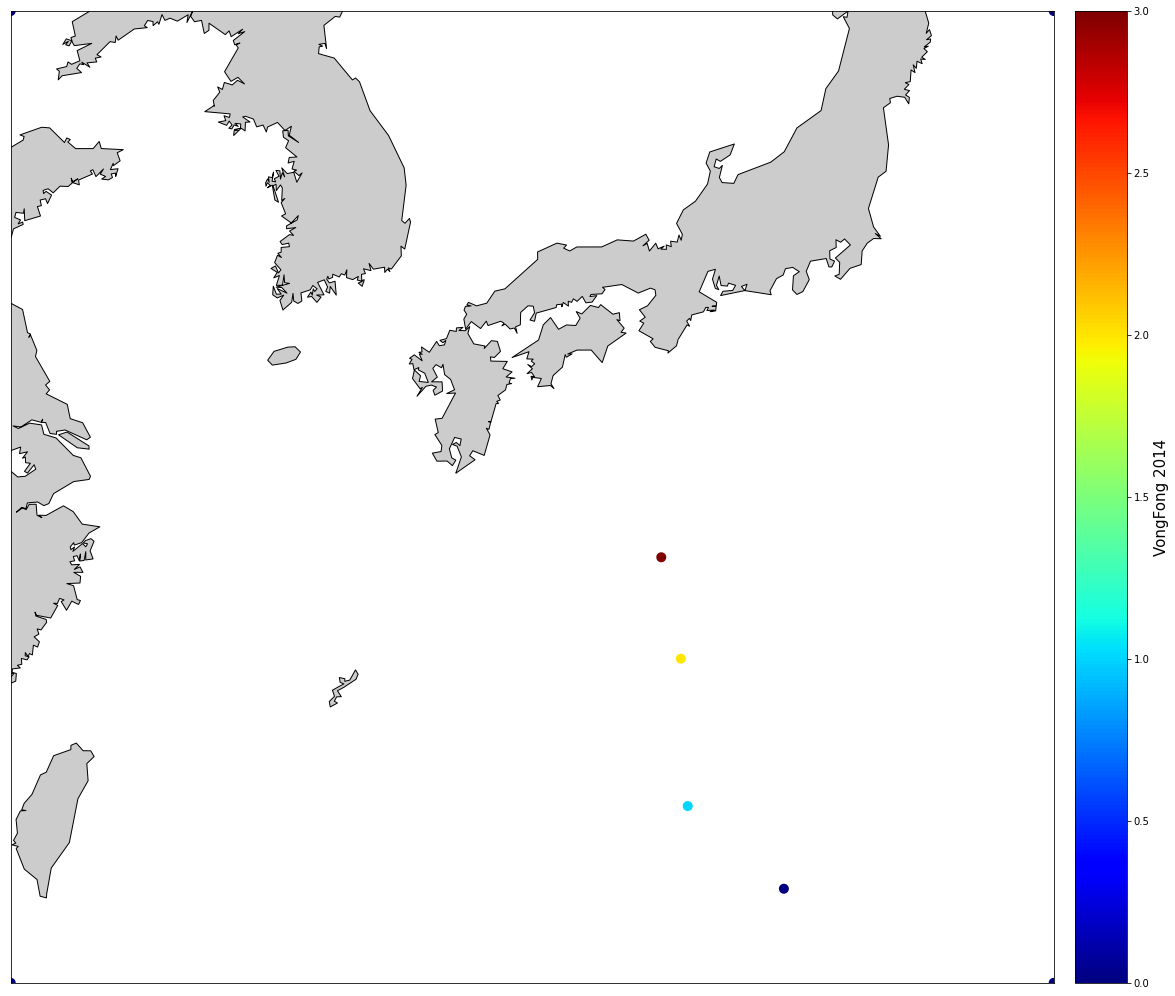

In [140]:
plot_typhoon_traj_kmean('2014-10-04 00:00:00+00:00',global_diff,'VongFong 2014',4)

## Detection of Typhoons

---

We used some tricks to reduce the size of the information to keep only the relevant data because the data set is really big.

We chose to detect typhoons based on the difference of sea surface temperature between two consecutive days. In order to keep only relevant values, we chose a threshold of -0.4°C.

We already used this trick before for the clustering method (global_diff)

When the sea surface temperature drop sudenly, it seems that a typhoon is there. 

So we decided to sum all the difference on sst between 2 days over the whole area, which will be an indicator of how the temperature is evolving on our area.

In [135]:
data = global_diff.groupby('time',axis=0).sum('somme diff_sst')['diff_sst']
data.index = data.index.map(dates.num2date)
data = data.iloc[1:]
data.describe()

count    6572.000000
mean     -285.543898
std       226.351636
min     -1611.000000
25%      -391.987500
50%      -219.900000
75%      -116.400000
max        -4.350000
Name: diff_sst, dtype: float64

To detect a disaster, we then chose a treshold around 600

In [195]:
detected_typhoon = data.loc[data.values<=-600]

Now, we have to sort the data because the typhoon spends multiple days in the area. Then fews days correspond to one typhoon. Also, we only need to check if 2 days in the data are concecutive days or not.

In [196]:
def number_typhoons(detected_typhoon):
  result = deepcopy(detected_typhoon)
  result.rename('detected typhoons',inplace=True)
  result[detected_typhoon.index[0]]=0
  for i in range(len(detected_typhoon.index)-1):
    if detected_typhoon.index[i+1]-detected_typhoon.index[i] <= np.timedelta64(2,'D'):
      result[result.index[i+1]]=result.values[i]

    else:
      result[result.index[i+1]]=result.values[i]+1
  
  return result

In [197]:
number_typhoons(detected_typhoon)

time
1998-01-04 00:00:00+00:00      0.0
1998-01-09 00:00:00+00:00      1.0
1998-01-31 00:00:00+00:00      2.0
1998-02-07 00:00:00+00:00      3.0
1998-02-10 00:00:00+00:00      4.0
                             ...  
2015-08-12 00:00:00+00:00    278.0
2015-08-13 00:00:00+00:00    278.0
2015-08-26 00:00:00+00:00    279.0
2015-08-27 00:00:00+00:00    279.0
2015-10-24 00:00:00+00:00    280.0
Name: detected typhoons, Length: 636, dtype: float64

One can see that between 1998 and 2015, there was 280 typhoons in the area. On the web site NOAA during 1998 and 2015, there was 234 typhoons in the area. Thus, we obtain a good approximation (same order of magnitude) but we can see that our detection counts a lot of false positives.

In order to remove false positives we juste have to count the number of recalled labels 

In [200]:
real_number_typhoons = 0
a = 0
nb_typhoons = [number_typhoons(detected_typhoon)[i] for i in range(len(number_typhoons(detected_typhoon)))]
while a < len(nb_typhoons):
    if nb_typhoons.count(nb_typhoons[a]) >= 2:
        real_number_typhoons += 1
        a += nb_typhoons.count(nb_typhoons[a])-1
    else:
        a += 1
real_number_typhoons

237

Here we obtain a better count of typhoons in the area !!

## Conclusion 

---

To conclude, we succeed in plotting typhoons trajectories on our area. Also we tried to detect typhoons happening and to track them. For this we had a large data set at our disposal and as main data the sst at a given point of the study area. This project allowed us to handle bigdata queries and to analyse the recovered data for a specific purpose.